<a href="https://colab.research.google.com/github/LeaCarop/LinearRegression_TensorFlow/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTE ES UN EJEMPLO QUE ESTOY TRABAJANDO PROVENIENTE DE UN CURSO INTENSIVO. 
NO SE PRUEBAN DATOS REALES.**

*El objetivo es usar TensorFlow*

In [46]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [47]:
# CREAR LA FUNCIÓN DEL MODELO:
def crear_modelo(my_learning_rate):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           

# CREAR LA FUNCIÓN DE ENTRENAMIENTO
def train_model(model, feature, label, epochs, batch_size):

  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # recopilar el peso y el sesgo del modelo entrenado
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  #almaceno la lista de épocas por separado
  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


In [48]:
def representacion(trained_weight, trained_bias, feature, label):

  plt.xlabel("feature")
  plt.ylabel("label")

  plt.scatter(feature, label)

  # represento la pendiente
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # muestro el gráfico
  plt.show()

def curva_perdida(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


In [49]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

epochs = 10                 
my_batch_size = 12           
learning_rate = 0.01   

**PRIMER INTENTO**

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 299ms/step - loss: 220.0330 - root_mean_squared_error: 14.8335
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 212.3715 - root_mean_squared_error: 14.5730
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 206.9447 - root_mean_squared_error: 14.3856
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 202.4779 - root_mean_squared_error: 14.2295
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 198.5691 - root_mean_squared_error: 14.0915
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 195.0321 - root_mean_squared_error: 13.9654
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 191.7634 - root_mean_squared_error: 13.8479
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 188.6990 - root_mean_squared_error: 13.7368
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 185.7957 - root_mean_sq

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


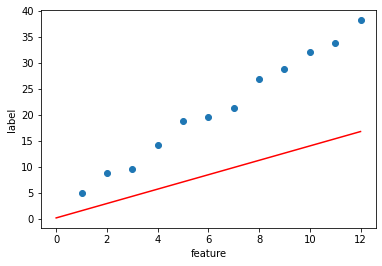

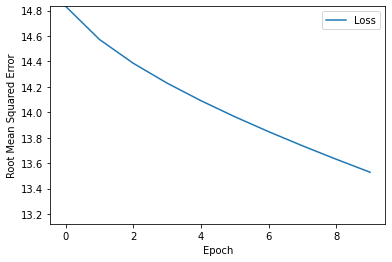

In [50]:
my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

El primer gráfico muestra que el modelo no se ha ajustado bien. Los valores de la función de pérdida y el error son bastante elevados.
En el segundo gráfico vemos que la función de pérdida tiende a disminuir, pero no a aplanarse. Seguramente porque el modelo necesita más entrenamiento.

Voy a seguir trabajando...

**SEGUNDO INTENTO** --> Incremento el número de epochs.

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 493ms/step - loss: 349.5749 - root_mean_squared_error: 18.6969
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 339.8923 - root_mean_squared_error: 18.4362
Epoch 3/500
1/1 [==============================] - 0s 29ms/step - loss: 332.9993 - root_mean_squared_error: 18.2483
Epoch 4/500
1/1 [==============================] - 0s 39ms/step - loss: 327.3052 - root_mean_squared_error: 18.0916
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 322.3072 - root_mean_squared_error: 17.9529
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 317.7722 - root_mean_squared_error: 17.8262
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 313.5710 - root_mean_squared_error: 17.7079
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 309.6230 - root_mean_squared_error: 17.5961
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 305.8744 - 

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


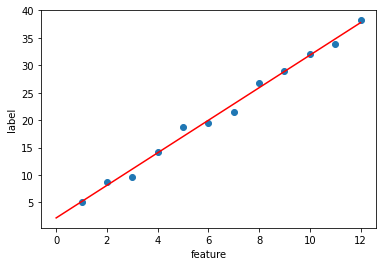

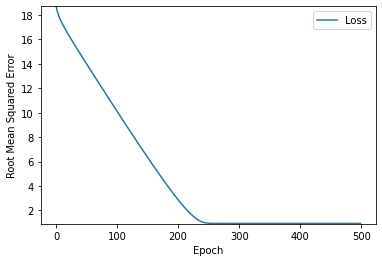

In [52]:
epochs= 500

my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

Veamos como aumentar el número de epochs ha mejorado el modelo.

En la gráfica 1 el modelo converge. La representación muestra como la pendiente se ha ajustado perfectamente, minimizando/reduciendo la pérdida a nada más y nada menos que 0,8768. Es un valor muy bueno y, totalmente asumible.

El gráfico 2 muestra cómo se ha logrado disminuir y aplanar el error. En este caso, usé 500 epochs, seguramente reduciéndo un poco (más o menos a 400), hubiese alcanzado el mismo efecto.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/400
1/1 [==============================] - 1s 663ms/step - loss: 298.1849 - root_mean_squared_error: 17.2680
Epoch 2/400
1/1 [==============================] - 0s 18ms/step - loss: 289.2495 - root_mean_squared_error: 17.0073
Epoch 3/400
1/1 [==============================] - 0s 10ms/step - loss: 282.8985 - root_mean_squared_error: 16.8196
Epoch 4/400
1/1 [==============================] - 0s 11ms/step - loss: 277.6582 - root_mean_squared_error: 16.6631
Epoch 5/400
1/1 [==============================] - 0s 14ms/step - loss: 273.0627 - root_mean_squared_error: 16.5246
Epoch 6/400
1/1 [==============================] - 0s 10ms/step - loss: 268.8968 - root_mean_squared_error: 16.3981
Epoch 7/400
1/1 [==============================] - 0s 8ms/step - loss: 265.0404 - root_mean_squared_error: 16.2801
Epoch 8/400
1/1 [==============================] - 0s 12ms/step - loss: 261.4190 - root_mean_squared_error: 16.1685
Epoch 9/400
1/1 [==============================] - 0s 12ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


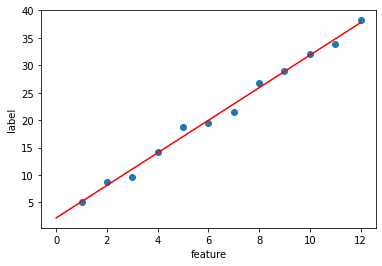

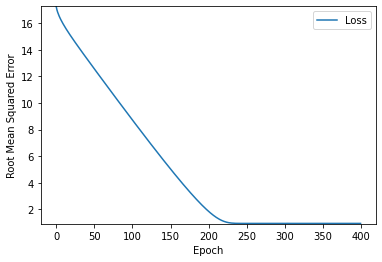

In [55]:
epochs= 400

my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

Los resultados alcanzados en el SEGUNDO INTENTO solo cambiando el número de epochs han dado resultado. Pero, ahora voy a probar si cambiando el resto de hiperparámetros logro obtener un buen modelo. 

**TERCER INTENTO** --> Incremento la tasa de aprendizaje.

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 307ms/step - loss: 528.1012 - root_mean_squared_error: 22.9805
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 36.8227 - root_mean_squared_error: 6.0682
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 3.1721 - root_mean_squared_error: 1.7810
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 1.0476 - root_mean_squared_error: 1.0235
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 0.9492 - root_mean_squared_error: 0.9743
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.9433 - root_mean_squared_error: 0.9712
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.9399 - root_mean_squared_error: 0.9695
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.9366 - root_mean_squared_error: 0.9678
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.9334 - root_mean_squared_error: 0.9661
Ep

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


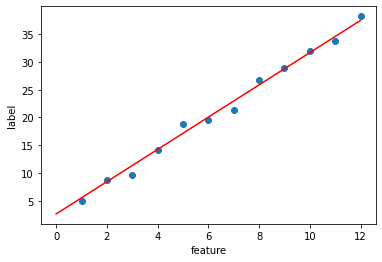

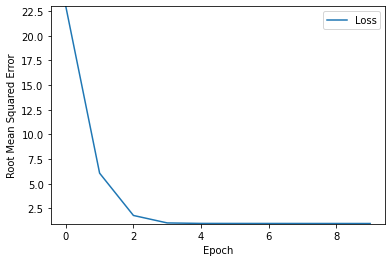

In [60]:
learning_rate=0.65
epochs=10

my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

Bueno, manteniendo el número de epochs inicial (10) y aumentando lr = 0.65 he conseguido ajustar el modelo, alcanzando una pérdida de 0,9301. 
Sin embargo, aunque la tasa de aprendizaje es un buen hiperparámetro a tener en cuenta, yo prefiero aumentar los epochs y disminuir el lr. Ya que un lr alto hace que el paso de una iteracción a otra sea elavado y puede pasarse del mínimo que estoy buscando.

Voy a probar algo nuevo a ver que sale...

**CUARTO INTENTO**

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 299ms/step - loss: 340.5154 - root_mean_squared_error: 18.4531
Epoch 2/60
1/1 [==============================] - 0s 11ms/step - loss: 175.3156 - root_mean_squared_error: 13.2407
Epoch 3/60
1/1 [==============================] - 0s 8ms/step - loss: 102.0807 - root_mean_squared_error: 10.1035
Epoch 4/60
1/1 [==============================] - 0s 11ms/step - loss: 61.4874 - root_mean_squared_error: 7.8414
Epoch 5/60
1/1 [==============================] - 0s 9ms/step - loss: 37.3195 - root_mean_squared_error: 6.1090
Epoch 6/60
1/1 [==============================] - 0s 10ms/step - loss: 22.5767 - root_mean_squared_error: 4.7515
Epoch 7/60
1/1 [==============================] - 0s 10ms/step - loss: 13.5649 - root_mean_squared_error: 3.6831
Epoch 8/60
1/1 [==============================] - 0s 10ms/step - loss: 8.1170 - root_mean_squared_error: 2.8490
Epoch 9/60
1/1 [==============================] - 0s 9ms/step - loss: 4.8887 - root_mean_squared_error:

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


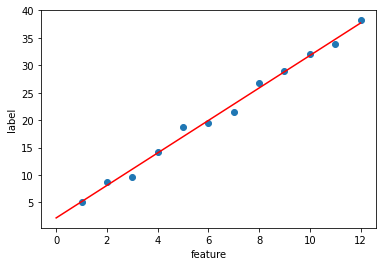

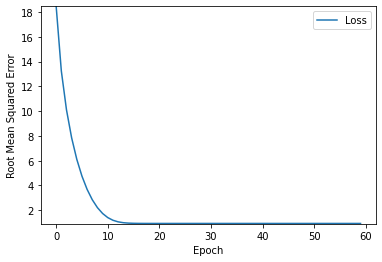

In [63]:
learning_rate=0.20
epochs=60

my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

¡¡Bien!! Estos resultados me gustan más. Veamos como disminuir el lr y aumentar un poco el número de epochs de 10 a 60 muestra una solución óptima donde el modelo converge y el error toma un valor pequeño. 

De todas formas, si sois como yo y os gustar tener cuidado con el lr, disminuyendo un poco más y aumentando otro poco los epochs, tambiés es posible obtener un buen modelo.

Ahora, voy a hacer lo mismo que en el caso anterior y voy a modificar batch_size para ver los resultados.

**QUINTO INTENTO**

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 142.7420 - root_mean_squared_error: 11.9475
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 110.6673 - root_mean_squared_error: 10.5199
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 88.7511 - root_mean_squared_error: 9.4208
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 70.0703 - root_mean_squared_error: 8.3708
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 53.7101 - root_mean_squared_error: 7.3287
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 39.6798 - root_mean_squared_error: 6.2992
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 28.3551 - root_mean_squared_error: 5.3249
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 18.8425 - root_mean_squared_error: 4.3408
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 11.6448 - root_

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


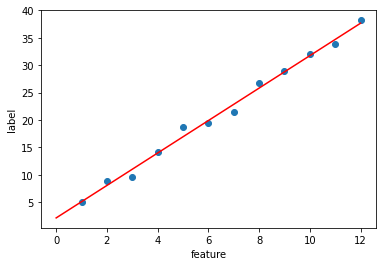

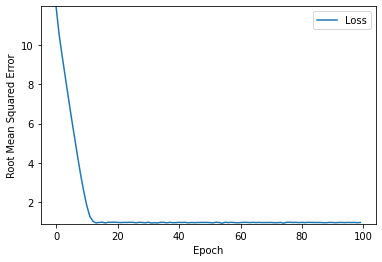

In [81]:
learning_rate=0.015
epochs=100
my_batch_size=1

my_model = crear_modelo(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
representacion(trained_weight, trained_bias, my_feature, my_label)
curva_perdida(epochs, rmse)

¡Vaya! No voy a decir que fue el primero que probé, pero sí el de mejor resultado, aunque todos los anteriores se mantuvieran en una pérdida y error entorno al 1.

Veamos como un equilibrio entre los tres hiperparámetros consigue que alcancemos un buen modelo.

**CONCLUSIÓN**

- La pérdida de entrenamiento debe disminuir de manera constante, abruptamente al principio y luego más lentamente hasta que la pendiente de la curva de pérdida alcance o se acerque a cero.

- Si la pérdida de entrenamiento no converge, aumentar el número de epochs.

- Si la pérdida de entrenamiento disminuye demasiado lentamente, aumentar lr.

- Si la pérdida de entrenamiento varía mucho (es decir, la pérdida de entrenamiento salta), reducir la tasa de aprendizaje. Ya que, establecer una tasa de aprendizaje demasiado alta también puede evitar que la pérdida de entrenamiento converja.

- Reducir la tasa de aprendizaje mientras se aumenta el número de épocas o el tamaño del lote suele ser una buena combinación.

- Establecer el tamaño del lote en un número de lote muy pequeño también puede causar inestabilidad. Primero, pruebe con valores de tamaño de lote grandes. Luego, disminuya el tamaño del lote hasta que vea degradación (como hice en el QUINTO INTENTO). 